In [1]:
from sympy import symbols,diff, Matrix, hessian, randMatrix, log, zeros
import numpy as np 
import matplotlib.pyplot as plt


#Problem 1

d = 6
m = 7

x = symbols('x0:' + str(d))

a = randMatrix(m,d,-50,50,seed=2)/10

f = -sum(log(1-a.row(i).dot(x)) for i in range(m))-sum(log(1-x[i]**2) for i in range(d))
gradient_f = Matrix([diff(f, xi) for xi in x])
H = hessian(f, x)


In [2]:
x_0 = [0.01,0.01,0.01,0.01,0.01,0.01]

# create damped newton method

def damped_newton(x_0, f, gradient_f, H, alpha=0.1, beta=0.5, epsilon=1e-30, max_iter=100):
    global x
    x_s = Matrix(x_0)
    f_iter = []
    for i in range(max_iter):
        gradient = gradient_f.subs(zip(x,x_s))
        Hessian = H.subs(zip(x,x_s))
        p = -Hessian.inv()*gradient
        t = 1
        while f.subs(zip(x,x_s+t*p)) > f.subs(zip(x,x_s))+alpha*t*gradient.dot(p):
            t *= beta
        x_s += t*p
        lambda2 = gradient.dot(Hessian.inv()*gradient)
        if lambda2 < 2*epsilon:
            break
        f_iter.append(f.subs(zip(x,x_s)))
    return [x_s, f.subs(zip(x,x_s)), f_iter, lambda2, i]

result = damped_newton(x_0, f, gradient_f, H)

Text(0.5, 1.0, 'damped newton method - log(f(x)-f(x*)) vs iteration')

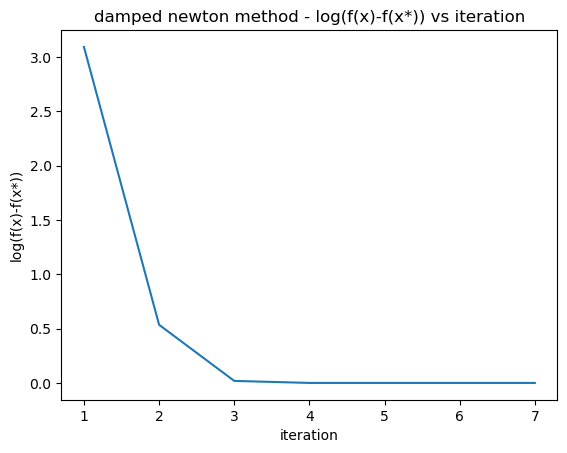

In [3]:
plt.plot(range(1,result[4]+1),[result[2][i] - result[1] for i in range(result[4])] )
plt.xlabel('iteration')
plt.ylabel('log(f(x)-f(x*))')
plt.title('damped newton method - log(f(x)-f(x*)) vs iteration')

Text(0.5, 1.0, 'damped newton method - f(x)-f(x*) vs iteration')

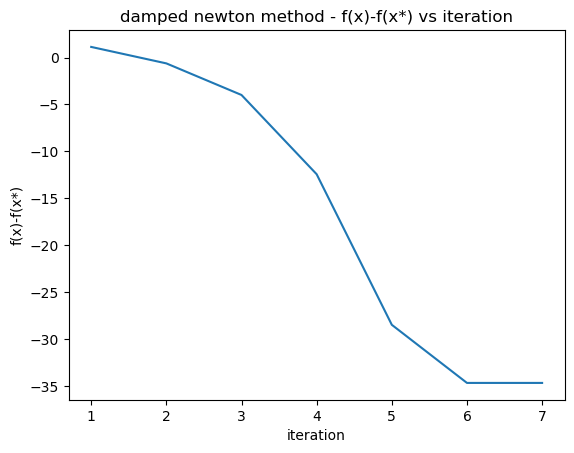

In [4]:
import matplotlib.pyplot as plt

plt.plot(range(1,result[4]+1),[log(result[2][i] - result[1]) for i in range(result[4])] )
plt.xlabel('iteration')
plt.ylabel('f(x)-f(x*)')
plt.title('damped newton method - f(x)-f(x*) vs iteration')

In [5]:
# Problem 2

d = 10
m=20

# create 20 random positive definite matrices using numpy

matrices = []

for i in range(m):
    # Generate a random matrix
    np.random.seed(i)
    A = np.random.rand(d,d)*50
    
    # Make the matrix positive-definite
    B = A.T.dot(A)
    
    # Add the matrix to the list
    matrices.append(B)


vectors = []

for i in range(m):
    np.random.seed(i+m)
    b = np.random.rand(d,1)
    vectors.append(b)

print([(vectors[i].T.dot(np.linalg.inv(matrices[i])).dot(vectors[i]))[0] > 2 for i in range(m)])


[array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False])]


In [6]:
def f(x):
    global matrices, vectors
    return 0.5*sum([(0.5*x.T.dot(matrices[i].dot(x)) + vectors[i].T.dot(x) + 1)**2 for i in range(m)])

def gradient_f(x):
    global matrices, vectors
    return sum([(0.5*x.T.dot(matrices[i].dot(x)) + vectors[i].T.dot(x) + 1)*(matrices[i].dot(x) + vectors[i]) for i in range(m)], np.zeros((d,1)))

def hessian_f(x):
    global matrices, vectors
    return sum([(matrices[i].dot(x)+vectors[i])*(matrices[i].dot(x)+vectors[i]).T for i in range(m)], np.zeros((d,d)))

x_0 = np.random.rand(d)

In [7]:
def gauss_newton(x_0, f, gradient_f, hessian_f, alpha=0.1, beta=0.5, epsilon=1e-3, max_iter=10000):
    f_iter = []
    x_iter = []
    x_s = x_0
    for i in range(max_iter):
        gradient = gradient_f(x_s)
        Hessian = hessian_f(x_s)
        p = -np.linalg.inv(Hessian).dot(gradient)
        if  np.linalg.norm(gradient)< epsilon:
            break
        t = 1
        while f(x_s+t*p)[0] > f(x_s)[0]+alpha*t*(gradient.T.dot(p))[0]:
            t *= beta
        x_s += t*p
        f_iter.append(f(x_s))
        x_iter.append(x_s.copy())
    return [x_s, f(x_s), x_iter, f_iter, np.linalg.norm(gradient), i]


In [8]:
result_2 = gauss_newton(np.array([[1] for _ in range(d)],dtype='float'),f,gradient_f, hessian_f)

Text(0.5, 1.0, 'gauss-newton method - f(x)-f(x*) vs iteration')

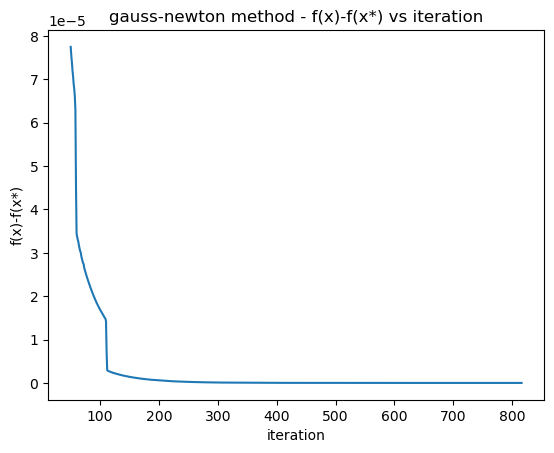

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(50,result_2[5]+1),[ (result_2[3][i][0]-result_2[1][0]) for i in range(49,result_2[5])] )
plt.xlabel('iteration')
plt.ylabel('f(x)-f(x*)')
plt.title('gauss-newton method - f(x)-f(x*) vs iteration')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9512\1323079155.py:2: RuntimeWarning: invalid value encountered in log
  plt.plot(range(1,result_2[5]),[np.log(np.log(np.linalg.norm(result_2[2][i]-result_2[0],ord=2))-np.log(np.linalg.norm(result_2[2][-2]-result_2[0],ord=2))) for i in range(result_2[5]-1)] )
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9512\1323079155.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(range(1,result_2[5]),[np.log(np.log(np.linalg.norm(result_2[2][i]-result_2[0],ord=2))-np.log(np.linalg.norm(result_2[2][-2]-result_2[0],ord=2))) for i in range(result_2[5]-1)] )


Text(0.5, 1.0, 'gauss-newton method - log(log(||x_n-x*||)) vs iteration')

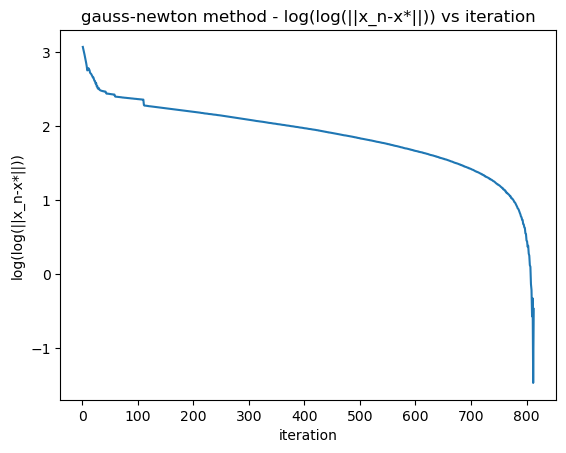

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1,result_2[5]),[np.log(np.log(np.linalg.norm(result_2[2][i]-result_2[0],ord=2))-np.log(np.linalg.norm(result_2[2][-2]-result_2[0],ord=2))) for i in range(result_2[5]-1)] )
plt.xlabel('iteration')
plt.ylabel('log(log(||x_n-x*||))')
plt.title('gauss-newton method - log(log(||x_n-x*||)) vs iteration')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9512\552481210.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot([np.log(i) for i in range(1,result_2[5]+1)],[np.log(np.linalg.norm(result_2[2][i]-result_2[0],ord=2)) for i in range(result_2[5])] )


Text(0.5, 1.0, 'gauss-newton method - log(||x_n-x*||) vs log(n)')

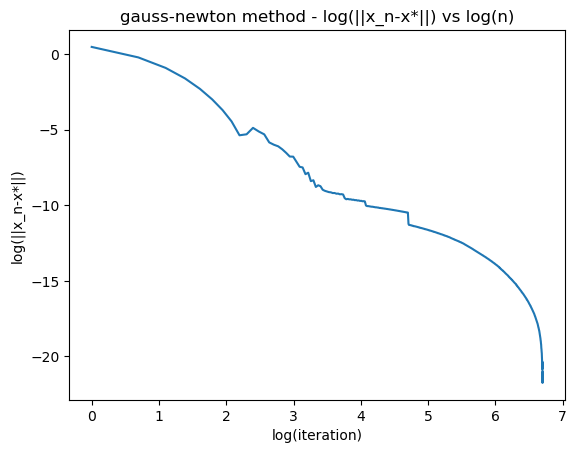

In [11]:
import matplotlib.pyplot as plt
plt.plot([np.log(i) for i in range(1,result_2[5]+1)],[np.log(np.linalg.norm(result_2[2][i]-result_2[0],ord=2)) for i in range(result_2[5])] )
plt.xlabel('log(iteration)')
plt.ylabel('log(||x_n-x*||)')
plt.title('gauss-newton method - log(||x_n-x*||) vs log(n)')
# It is a linear relation between log(||x_n-x*||) and log(n).